#Курсовой проект
##Д.А. Ивлев

## 1. Описание скрпитов, импорт библиотек и загрузка данных  <a class='anchor' id='preparation'>

###Подключение библиотек

In [ ]:
# Импортируем базовые бибилиотеки
import numpy as np
import pandas as pd
import random
from datetime import datetime

# Импортируем модули из библиотеки scikit-learn
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score as r2, mean_absolute_error as mae, mean_squared_error as mse, roc_auc_score as auc
from sklearn.tree import DecisionTreeRegressor

In [ ]:
# Импортируем и настраиваем модули для отрисовки графиков
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
matplotlib.rcParams.update({'font.size': 14})
%config InlineBackend.figure_format = 'svg'
%matplotlib inline

In [ ]:
import warnings
warnings.filterwarnings('ignore')

###Описание скриптов

In [ ]:
def evaluate_preds(train_true_values, train_pred_values, test_true_values, test_pred_values):
    print("Train R2:\t" + str(round(r2(train_true_values, train_pred_values), 3)))
    print("Test R2:\t" + str(round(r2(test_true_values, test_pred_values), 3)))
    
    plt.figure(figsize=(9,3))
    
    plt.subplot(121)
    sns.scatterplot(x=train_pred_values, y=train_true_values)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Train sample prediction')
    
    plt.subplot(122)
    sns.scatterplot(x=test_pred_values, y=test_true_values)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Test sample prediction')

    plt.show()

###Загрузка данных

**Описание датасета**

* **Id** - идентификационный номер квартиры
* **DistrictId** - идентификационный номер района
* **Rooms** - количество комнат
* **Square** - площадь
* **LifeSquare** - жилая площадь
* **KitchenSquare** - площадь кухни
* **Floor** - этаж
* **HouseFloor** - количество этажей в доме
* **HouseYear** - год постройки дома
* **Ecology_1, Ecology_2, Ecology_3** - экологические показатели местности
* **Social_1, Social_2, Social_3** - социальные показатели местности
* **Healthcare_1, Helthcare_2** - показатели местности, связанные с охраной здоровья
* **Shops_1, Shops_2** - показатели, связанные с наличием магазинов, торговых центров
* **Price** - цена квартиры

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
TRAIN_DATASET_PATH = '/content/drive/My Drive/_ML/GB/5_py_alg/webinar6/train.csv'
TEST_DATASET_PATH = '/content/drive/My Drive/_ML/GB/5_py_alg/webinar6/test.csv'

In [ ]:
train_df = pd.read_csv(TRAIN_DATASET_PATH)
train_df.head(10)

Id  DistrictId  Rooms  ...  Shops_1  Shops_2          Price
0  11809          27    3.0  ...        0        B  305018.871089
1   3013          22    1.0  ...        0        B  177734.553407
2   8215           1    3.0  ...        1        B  282078.720850
3   2352           1    1.0  ...        1        B  168106.007630
4  13866          94    2.0  ...        6        B  343995.102962
5   5804          99    3.0  ...        4        B  161044.944138
6   8864          44    1.0  ...        3        B  142402.739272
7  13072          59    2.0  ...        5        B  326174.175191
8   9951           1    1.0  ...        1        B  160400.401732
9   8094           6    3.0  ...        0        B  194756.023945

[10 rows x 20 columns]

In [ ]:
test_df = pd.read_csv(TEST_DATASET_PATH)
test_df.head(10)

Id  DistrictId  Rooms  ...  Helthcare_2  Shops_1  Shops_2
0  4567          44    1.0  ...            1        1        B
1  5925          62    1.0  ...            0        0        A
2   960          27    2.0  ...            0        1        B
3  3848          23    3.0  ...            0        0        B
4   746          74    1.0  ...            0        6        B
5   868          38    3.0  ...            0        7        B
6   672          62    1.0  ...            0        0        A
7  2471           2    2.0  ...            2        5        B
8  4510           1    1.0  ...            0        1        B
9  8354          62    2.0  ...            1        5        A

[10 rows x 19 columns]

###Приведение типов

In [ ]:
train_df.dtypes

Id                 int64
DistrictId         int64
Rooms            float64
Square           float64
LifeSquare       float64
KitchenSquare    float64
Floor              int64
HouseFloor       float64
HouseYear          int64
Ecology_1        float64
Ecology_2         object
Ecology_3         object
Social_1           int64
Social_2           int64
Social_3           int64
Healthcare_1     float64
Helthcare_2        int64
Shops_1            int64
Shops_2           object
Price            float64
dtype: object

In [ ]:
test_df.dtypes

Id                 int64
DistrictId         int64
Rooms            float64
Square           float64
LifeSquare       float64
KitchenSquare    float64
Floor              int64
HouseFloor       float64
HouseYear          int64
Ecology_1        float64
Ecology_2         object
Ecology_3         object
Social_1           int64
Social_2           int64
Social_3           int64
Healthcare_1     float64
Helthcare_2        int64
Shops_1            int64
Shops_2           object
dtype: object

In [ ]:
print('Строк в трейне:', train_df.shape[0])
print('Строк в тесте', test_df.shape[0])

Строк в трейне: 10000
Строк в тесте 5000


* Id не кажется признаком, пригодным для построения модели
* DistrictId не кажется признаком, пригодным для построения модели

Приводим их тип к строковому!

In [ ]:
train_df['Id'] = train_df['Id'].astype(str)
train_df['DistrictId'] = train_df['DistrictId'].astype(str)

## 2. EDA  <a class='anchor' id='eda'>

####**Целевая переменная**

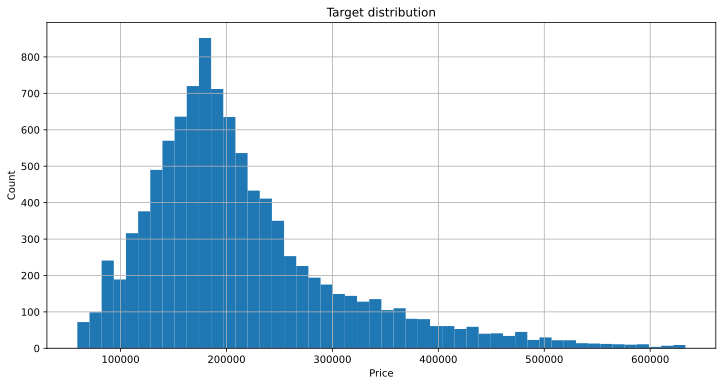

In [ ]:
plt.figure(figsize = (12, 6))

train_df['Price'].hist(bins=50)
plt.ylabel('Count')
plt.xlabel('Price')

plt.title('Target distribution')
plt.show()

####**Количественные переменные**

In [ ]:
train_df.describe()

Rooms        Square  ...       Shops_1          Price
count  10000.000000  10000.000000  ...  10000.000000   10000.000000
mean       1.890500     56.315775  ...      4.231300  214138.857399
std        0.839512     21.058732  ...      4.806341   92872.293865
min        0.000000      1.136859  ...      0.000000   59174.778028
25%        1.000000     41.774881  ...      1.000000  153872.633942
50%        2.000000     52.513310  ...      3.000000  192269.644879
75%        2.000000     65.900625  ...      6.000000  249135.462171
max       19.000000    641.065193  ...     23.000000  633233.466570

[8 rows x 15 columns]

###2.1 Исправление выбросов <a class='anchor' id='outlier'>

####'**Rooms**'

In [ ]:
train_df['Rooms'].value_counts()

2.0     3880
1.0     3705
3.0     2235
4.0      150
5.0       18
0.0        8
10.0       2
19.0       1
6.0        1
Name: Rooms, dtype: int64

In [ ]:
train_df['Rooms_outlier'] = 0
train_df.loc[(train_df['Rooms'] == 0) | (train_df['Rooms'] >= 6), 'Rooms_outlier'] = 1

train_df.loc[train_df['Rooms'] == 0, 'Rooms'] = 1
train_df.loc[train_df['Rooms'] >= 6, 'Rooms'] = train_df['Rooms'].median()

In [ ]:
train_df['Square'].value_counts()

26.553188     1
46.363496     1
100.751999    1
70.726600     1
40.523022     1
             ..
76.481158     1
86.915187     1
82.482521     1
43.112986     1
97.664912     1
Name: Square, Length: 10000, dtype: int64

In [ ]:
condition = (train_df['Square'].isna()) \
             | (train_df['Square'] > train_df['Square'].quantile(.975))

train_df.loc[condition, 'Square'] = train_df['Square'].median()
train_df.loc[train_df['Square'] < train_df['KitchenSquare'] + train_df['LifeSquare'], 'Square'] = train_df['KitchenSquare'] + train_df['LifeSquare']

####'**LifeSquare**'


In [ ]:
train_df['LifeSquare'].value_counts()

28.003539    1
19.224066    1
21.613298    1
25.688943    1
44.662105    1
            ..
37.980219    1
17.130385    1
33.273700    1
28.313300    1
28.421652    1
Name: LifeSquare, Length: 7887, dtype: int64

In [ ]:
condition = (train_df['LifeSquare'].isna()) \
             | (train_df['LifeSquare'] > train_df['LifeSquare'].quantile(.975))
        
train_df.loc[condition, 'LifeSquare'] = train_df['LifeSquare'].median()
train_df.loc[train_df['LifeSquare'] < 6, 'LifeSquare'] = 6 # согласно законодательству РФ

####'**KitchenSquare**'

In [ ]:
train_df['KitchenSquare'].value_counts()

1.0       2460
8.0       1306
5.0       1169
10.0      1075
6.0       1038
9.0        843
0.0        697
7.0        609
12.0       249
11.0       233
13.0        67
14.0        51
4.0         39
15.0        31
3.0         22
16.0        16
20.0        14
17.0        12
19.0        11
18.0         6
2.0          4
22.0         3
43.0         2
112.0        2
41.0         2
32.0         2
58.0         2
25.0         2
37.0         2
30.0         2
51.0         2
40.0         1
96.0         1
48.0         1
72.0         1
73.0         1
2014.0       1
66.0         1
36.0         1
78.0         1
54.0         1
29.0         1
31.0         1
35.0         1
62.0         1
39.0         1
1970.0       1
60.0         1
75.0         1
26.0         1
21.0         1
84.0         1
63.0         1
123.0        1
53.0         1
42.0         1
23.0         1
27.0         1
Name: KitchenSquare, dtype: int64

In [ ]:
condition = (train_df['KitchenSquare'].isna()) \
             | (train_df['KitchenSquare'] > train_df['KitchenSquare'].quantile(.975))
        
train_df.loc[condition, 'KitchenSquare'] = train_df['KitchenSquare'].median()
train_df.loc[train_df['KitchenSquare'] < 1, 'KitchenSquare'] = 1

####**'Square'**

In [ ]:
train_df['Square'].value_counts()

52.513310     76
26.553188      1
86.846526      1
34.346002      1
105.650688     1
              ..
38.718684      1
61.453027      1
82.482521      1
87.848494      1
97.664912      1
Name: Square, Length: 9925, dtype: int64

In [ ]:
condition = (train_df['Square'].isna()) \
             | (train_df['Square'] > train_df['Square'].quantile(.975))

train_df.loc[condition, 'Square'] = train_df['Square'].median()
train_df.loc[train_df['Square'] < train_df['KitchenSquare'] + train_df['LifeSquare'], 'Square'] = train_df['KitchenSquare'] + train_df['LifeSquare']

####**'HouseFloor', 'Floor'**

In [ ]:
train_df['HouseFloor'].sort_values().unique()

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        36.,  37.,  38.,  39.,  40.,  44.,  45.,  47.,  48.,  99., 117.])

In [ ]:
train_df['Floor'].sort_values().unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 31, 32, 33, 37, 42])

In [ ]:
train_df['HouseFloor_outlier'] = 0
train_df.loc[train_df['HouseFloor'] == 0, 'HouseFloor_outlier'] = 1
train_df.loc[train_df['HouseFloor'] == 0, 'HouseFloor'] = train_df['HouseFloor'].median()
train_df.loc[train_df['Floor'] > train_df['HouseFloor'], 'HouseFloor_outlier'] = 1

In [ ]:
floor_outliers = train_df.loc[train_df['HouseFloor_outlier'] == 1].index

In [ ]:
train_df.loc[floor_outliers, 'Floor'] = train_df.loc[floor_outliers, 'HouseFloor']\
                                                .apply(lambda x: random.randint(1, x))

####**'HouseYear'**

In [ ]:
train_df['HouseYear'].sort_values(ascending=False)

9163    20052011
8828        4968
7246        2020
2350        2020
8296        2020
          ...   
7610        1916
6250        1914
2066        1912
2795        1912
6794        1910
Name: HouseYear, Length: 10000, dtype: int64

In [ ]:
train_df.loc[train_df['HouseYear'] > 2020, 'HouseYear'] = 2020

###2.2 Заполнение пропусков <a class='anchor' id='nan'>

In [ ]:
train_df.isna().sum()

Id                       0
DistrictId               0
Rooms                    0
Square                   0
LifeSquare               0
KitchenSquare            0
Floor                    0
HouseFloor               0
HouseYear                0
Ecology_1                0
Ecology_2                0
Ecology_3                0
Social_1                 0
Social_2                 0
Social_3                 0
Healthcare_1          4798
Helthcare_2              0
Shops_1                  0
Shops_2                  0
Price                    0
Rooms_outlier            0
HouseFloor_outlier       0
dtype: int64

####**'Healthcare_1'**

In [ ]:
train_df.drop('Healthcare_1', axis=1, inplace=True)

###2.3 Data Preprocessing <a class='anchor' id='preprocessing'>
Соберем все проведенные нами процедуры в методы класса

In [ ]:
class DataPreprocessing:
    """Подготовка исходных данных"""

    def __init__(self):
        """Параметры класса"""
        self.medians=None
        self.kitchen_square_quantile = None
        
    def fit(self, X):
        """Сохранение статистик"""       
        # Расчет медиан и квантилей
        self.medians = X.median()
        n = 0.975
        self.kitchen_square_quantile = X['KitchenSquare'].quantile(n)
        self.life_square_quantile = X['LifeSquare'].quantile(n)
        self.square_quantile = X['Square'].quantile(n)
    
    def transform(self, X):
        """Трансформация данных"""

        # Rooms
        X['Rooms_outlier'] = 0
        X.loc[(X['Rooms'] == 0) | (X['Rooms'] >= 6), 'Rooms_outlier'] = 1
        X.loc[X['Rooms'] == 0, 'Rooms'] = 1
        X.loc[X['Rooms'] >= 6, 'Rooms'] = self.medians['Rooms']

        # LifeSquare
        condition = (X['LifeSquare'].isna()) \
                    | (X['LifeSquare'] > self.life_square_quantile)
        X.loc[condition, 'LifeSquare'] = self.medians['LifeSquare']
        X.loc[X['LifeSquare'] < 6, 'LifeSquare'] = 6

        # KitchenSquare
        condition = (X['KitchenSquare'].isna()) \
                    | (X['KitchenSquare'] > self.kitchen_square_quantile)
        X.loc[condition, 'KitchenSquare'] = self.medians['KitchenSquare']
        X.loc[X['KitchenSquare'] < 3, 'KitchenSquare'] = 3
        
        # Square
        condition = (X['Square'].isna()) \
                    | (X['Square'] > self.square_quantile)
        X.loc[condition, 'Square'] = self.medians['Square']
        X.loc[X['Square'] < X['KitchenSquare'] + X['LifeSquare'], 'Square'] = X['KitchenSquare'] + X['LifeSquare']
        
        # HouseFloor, Floor
        X['HouseFloor_outlier'] = 0
        X.loc[X['HouseFloor'] == 0, 'HouseFloor_outlier'] = 1
        X.loc[X['Floor'] > X['HouseFloor'], 'HouseFloor_outlier'] = 1
        X.loc[X['HouseFloor'] == 0, 'HouseFloor'] = self.medians['HouseFloor']
        floor_outliers = X.loc[X['HouseFloor_outlier'] == 1].index
        X.loc[floor_outliers, 'Floor'] = X.loc[floor_outliers, 'HouseFloor']\
                                            .apply(lambda x: random.randint(1, x))
        
        # HouseYear
        current_year = datetime.now().year
        X['HouseYear_outlier'] = 0
        X.loc[X['HouseYear'] > current_year, 'HouseYear_outlier'] = 1
        X.loc[X['HouseYear'] > current_year, 'HouseYear'] = current_year
        # Healthcare_1
        if 'Healthcare_1' in X.columns:
            X.drop('Healthcare_1', axis=1, inplace=True)

        # Final check
        X.fillna(self.medians, inplace=True)
        
        return X

###2.4 Генерация новых признаков <a class='anchor' id='feature'>

####**Dummies**

In [ ]:
binary_to_numbers = {'A': 0, 'B': 1}
train_df['Ecology_2'] = train_df['Ecology_2'].replace(binary_to_numbers)
train_df['Ecology_3'] = train_df['Ecology_3'].replace(binary_to_numbers)
train_df['Shops_2'] = train_df['Shops_2'].replace(binary_to_numbers)

####**DistrictSize, IsDistrictLarge**

In [ ]:
district_size = train_df['DistrictId'].value_counts().reset_index()\
                    .rename(columns={'index':'DistrictId', 'DistrictId':'DistrictSize'})
train_df = train_df.merge(district_size, on='DistrictId', how='left')
train_df['IsDistrictLarge'] = (train_df['DistrictSize'] > 100).astype(int)
train_df.head()

Id DistrictId  Rooms  ...  HouseFloor_outlier  DistrictSize  IsDistrictLarge
0  11809         27    3.0  ...                   0           851                1
1   3013         22    1.0  ...                   0            78                0
2   8215          1    3.0  ...                   0           652                1
3   2352          1    1.0  ...                   0           652                1
4  13866         94    2.0  ...                   0            89                0

[5 rows x 23 columns]

####**MedPriceByDistrict**

In [ ]:
med_price_by_district = train_df.groupby(['DistrictId', 'Rooms'], as_index=False).agg({'Price':'median'})\
                            .rename(columns={'Price':'MedPriceByDistrict'})
train_df = train_df.merge(med_price_by_district, on=['DistrictId', 'Rooms'], how='left')

####**DistrictAge, IsDistrictNew**

In [ ]:
district_age = train_df.groupby(['DistrictId'], as_index=False).agg({'HouseYear':'median'}).\
                                            rename(columns={'HouseYear':'DistrictAge'})
train_df = train_df.merge(district_age, on='DistrictId', how='left')
train_df['IsDistrictNew'] = (train_df['DistrictAge'] > 2000).astype(int)
train_df.head()

Id DistrictId  Rooms  ...  MedPriceByDistrict  DistrictAge  IsDistrictNew
0  11809         27    3.0  ...       213530.788443       1977.0              0
1   3013         22    1.0  ...       146032.829834       1977.0              0
2   8215          1    3.0  ...       244005.272380       1977.0              0
3   2352          1    1.0  ...       146735.671740       1977.0              0
4  13866         94    2.0  ...       201584.441255       1976.0              0

[5 rows x 26 columns]

####**MedPriceByFloorYear**

In [ ]:
#Разбиение объектов  на категории в зависимости от этажа
def floor_to_cat(X):
    X['floor_cat'] = 0
    X.loc[X['Floor'] == 1, 'floor_cat'] = 1  
    X.loc[X['Floor'] == 2, 'floor_cat'] = 2
    X.loc[(X['Floor'] > 2) & (X['Floor'] <= 7), 'floor_cat'] = 3
    X.loc[(X['Floor'] > 7) & (X['Floor'] <= 15), 'floor_cat'] = 4
    X.loc[X['Floor'] > 15, 'floor_cat'] = 5
    X.loc[X['Floor'] == X['HouseFloor'], 'floor_cat'] = 6
    return X

#Разбиение объектов  на категории в зависимости от года постройки дома
def year_to_cat(X):
    X['year_cat'] = 0
    X.loc[X['HouseYear'] <= 1957, 'year_cat'] = 1
    X.loc[(X['HouseYear'] > 1957) & (X['HouseYear'] <= 1968), 'year_cat'] = 2
    X.loc[(X['HouseYear'] > 1968) & (X['HouseYear'] <= 1975), 'year_cat'] = 3
    X.loc[(X['HouseYear'] > 1975) & (X['HouseYear'] <= 1990), 'year_cat'] = 4
    X.loc[(X['HouseYear'] > 1990) & (X['HouseYear'] <= 2009), 'year_cat'] = 5
    X.loc[(X['HouseYear'] > 2009), 'year_cat'] = 6
    return X

In [ ]:
train_df = floor_to_cat(train_df)
train_df = year_to_cat(train_df)
train_df.head()

Id DistrictId  Rooms  ...  IsDistrictNew  floor_cat  year_cat
0  11809         27    3.0  ...              0          3         6
1   3013         22    1.0  ...              0          3         2
2   8215          1    3.0  ...              0          2         4
3   2352          1    1.0  ...              0          4         4
4  13866         94    2.0  ...              0          6         3

[5 rows x 28 columns]

In [ ]:
med_price_by_floor_year = train_df.groupby(['year_cat', 'floor_cat'], as_index=False).agg({'Price':'median'}).\
                                            rename(columns={'Price':'MedPriceByFloorYear'})
train_df = train_df.merge(med_price_by_floor_year, on=['year_cat', 'floor_cat'], how='left')
train_df.head()

Id DistrictId  Rooms  ...  floor_cat  year_cat  MedPriceByFloorYear
0  11809         27    3.0  ...          3         6        169749.173815
1   3013         22    1.0  ...          3         2        195257.224835
2   8215          1    3.0  ...          2         4        175298.291592
3   2352          1    1.0  ...          4         4        188724.570804
4  13866         94    2.0  ...          6         3        191800.737823

[5 rows x 29 columns]

####**Square fractions**

In [ ]:
train_df['LifeSquareFrac'] = train_df['LifeSquare']/train_df['Square']
train_df['KitchenSquareFrac'] = train_df['KitchenSquare']/train_df['Square']
train_df['LifeKitchenBalance'] = train_df['KitchenSquare']/train_df['LifeSquare']
train_df.head()

Id DistrictId  ...  KitchenSquareFrac  LifeKitchenBalance
0  11809         27  ...           0.190428            0.305052
1   3013         22  ...           0.200841            0.345286
2   8215          1  ...           0.127645            0.209767
3   2352          1  ...           0.024746            0.030505
4  13866         94  ...           0.140001            0.233387

[5 rows x 32 columns]

###2.5 Стандартизация признаков <a class='anchor' id='feature_scaling'>

In [ ]:
train_df.dtypes

Id                      object
DistrictId              object
Rooms                  float64
Square                 float64
LifeSquare             float64
KitchenSquare          float64
Floor                    int64
HouseFloor             float64
HouseYear                int64
Ecology_1              float64
Ecology_2                int64
Ecology_3                int64
Social_1                 int64
Social_2                 int64
Social_3                 int64
Helthcare_2              int64
Shops_1                  int64
Shops_2                  int64
Price                  float64
Rooms_outlier            int64
HouseFloor_outlier       int64
DistrictSize             int64
IsDistrictLarge          int64
MedPriceByDistrict     float64
DistrictAge            float64
IsDistrictNew            int64
floor_cat                int64
year_cat                 int64
MedPriceByFloorYear    float64
LifeSquareFrac         float64
KitchenSquareFrac      float64
LifeKitchenBalance     float64
dtype: o

In [ ]:
#StandardScaler, RobustScaler

In [ ]:
all_feature_names = list(train_df.columns)
feature_names_for_stand = train_df[all_feature_names].select_dtypes(include=['float64', 'float32', 'float16']).columns.tolist()

In [ ]:
scaler = RobustScaler()
stand_features = scaler.fit_transform(train_df[feature_names_for_stand])

In [ ]:
train_df[feature_names_for_stand] = pd.DataFrame(stand_features, columns=feature_names_for_stand)

In [ ]:
train_df.head()

Id DistrictId  ...  KitchenSquareFrac  LifeKitchenBalance
0  11809         27  ...           0.510533            0.502950
1   3013         22  ...           0.585174            0.668785
2   8215          1  ...           0.060498            0.110199
3   2352          1  ...          -0.677092           -0.628687
4  13866         94  ...           0.149070            0.207558

[5 rows x 32 columns]

In [ ]:
train_df.dtypes

Id                      object
DistrictId              object
Rooms                  float64
Square                 float64
LifeSquare             float64
KitchenSquare          float64
Floor                    int64
HouseFloor             float64
HouseYear                int64
Ecology_1              float64
Ecology_2                int64
Ecology_3                int64
Social_1                 int64
Social_2                 int64
Social_3                 int64
Helthcare_2              int64
Shops_1                  int64
Shops_2                  int64
Price                  float64
Rooms_outlier            int64
HouseFloor_outlier       int64
DistrictSize             int64
IsDistrictLarge          int64
MedPriceByDistrict     float64
DistrictAge            float64
IsDistrictNew            int64
floor_cat                int64
year_cat                 int64
MedPriceByFloorYear    float64
LifeSquareFrac         float64
KitchenSquareFrac      float64
LifeKitchenBalance     float64
dtype: o

###2.6 Feature Generator <a class='anchor' id='generator'>

In [ ]:
class FeatureGenetator():
    """Генерация новых признаков"""
    
    def __init__(self):
        self.DistrictId_counts = None
        self.binary_to_numbers = None
        self.med_price_by_district = None
        self.med_price_by_floor_year = None
        
    def fit(self, X, y=None):
        X = X.copy()
        # Binary features
        self.binary_to_numbers = {'A': 0, 'B': 1}
        # DistrictID
        self.district_size = X['DistrictId'].value_counts().reset_index()\
                              .rename(columns={'index':'DistrictId', 'DistrictId':'DistrictSize'})
        self.district_age = X.groupby(['DistrictId'], as_index=False).agg({'HouseYear':'median'})\
                              .rename(columns={'HouseYear':'DistrictAge'})

        # Target encoding
        ## District, Rooms
        df = X.copy()
        if y is not None:
            df['Price'] = y.values
            self.med_price_by_district = df.groupby(['DistrictId', 'Rooms'], as_index=False).agg({'Price':'median'})\
                                            .rename(columns={'Price':'MedPriceByDistrict'})
            self.med_price_by_district_median = self.med_price_by_district['MedPriceByDistrict'].median()
        ## floor, year
        if y is not None:
            df['Price'] = y.values
            df = self.floor_to_cat(df)
            df = self.year_to_cat(df)
            self.med_price_by_floor_year = df.groupby(['year_cat', 'floor_cat'], as_index=False).agg({'Price':'median'})\
                                            .rename(columns={'Price':'MedPriceByFloorYear'})
            self.med_price_by_floor_year_median = self.med_price_by_floor_year['MedPriceByFloorYear'].median()
        

        
    def transform(self, X):
        # Binary features
        X['Ecology_2'] = X['Ecology_2'].map(self.binary_to_numbers)  # self.binary_to_numbers = {'A': 0, 'B': 1}
        X['Ecology_3'] = X['Ecology_3'].map(self.binary_to_numbers)
        X['Shops_2'] = X['Shops_2'].map(self.binary_to_numbers)
        # DistrictId, IsDistrictLarge
        X = X.merge(self.district_size, on='DistrictId', how='left')
        X = X.merge(self.district_age, on='DistrictId', how='left')
        X['DistrictSize'].fillna(5, inplace=True)
        current_year = datetime.now().year
        X['DistrictAge'].fillna(current_year, inplace=True)
        X['IsDistrictLarge'] = (X['DistrictSize'] > 100).astype(int)
        X['IsDistrictNew'] = (X['DistrictAge'] > 2000).astype(int)
        # Square fractions
        X['LifeSquareFrac'] = X['LifeSquare']/X['Square']
        X['KitchenSquareFrac'] = X['KitchenSquare']/train_df['Square']
        X['LifeKitchenBalance'] = X['KitchenSquare']/X['LifeSquare']
        # More categorical features
        X = self.floor_to_cat(X)  # + столбец floor_cat
        X = self.year_to_cat(X)   # + столбец year_cat
        # Target encoding
        if self.med_price_by_district is not None:
            X = X.merge(self.med_price_by_district, on=['DistrictId', 'Rooms'], how='left')
            X.fillna(self.med_price_by_district_median, inplace=True)
        if self.med_price_by_floor_year is not None:
            X = X.merge(self.med_price_by_floor_year, on=['year_cat', 'floor_cat'], how='left')
            X.fillna(self.med_price_by_floor_year_median, inplace=True)
        return X
    
    def floor_to_cat(self, X):
        X['floor_cat'] = 0
        X.loc[X['Floor'] == 1, 'floor_cat'] = 1  
        X.loc[X['Floor'] == 2, 'floor_cat'] = 2
        X.loc[(X['Floor'] > 2) & (X['Floor'] <= 7), 'floor_cat'] = 3
        X.loc[(X['Floor'] > 7) & (X['Floor'] <= 15), 'floor_cat'] = 4
        X.loc[X['Floor'] > 15, 'floor_cat'] = 5
        X.loc[X['Floor'] == X['HouseFloor'], 'floor_cat'] = 6
        return X

    def year_to_cat(self, X):
        X['year_cat'] = 0
        X.loc[X['HouseYear'] <= 1957, 'year_cat'] = 1
        X.loc[(X['HouseYear'] > 1957) & (X['HouseYear'] <= 1968), 'year_cat'] = 2
        X.loc[(X['HouseYear'] > 1968) & (X['HouseYear'] <= 1975), 'year_cat'] = 3
        X.loc[(X['HouseYear'] > 1975) & (X['HouseYear'] <= 1990), 'year_cat'] = 4
        X.loc[(X['HouseYear'] > 1990) & (X['HouseYear'] <= 2009), 'year_cat'] = 5
        X.loc[(X['HouseYear'] > 2009), 'year_cat'] = 6
        return X

###2.7 Feature Standartizator <a class='anchor' id='standartizator'>

In [ ]:
class FeatureStandartizator():
    """Стандартизация всех признаков"""
    def __init__(self):
        self.standard_type = None
    
    def transform(self, X, method='standard'):
      df = X.copy()
      all_feature_names = list(df.columns)
      feature_names_for_stand = df[all_feature_names].select_dtypes(include=['float64', 'float32', 'float16']).columns.tolist()
      self.standard_type = method
      assert self.standard_type in ['standard', 'robust'], 'Неверно указан метод'
      if self.standard_type=='standard':
        scaler = StandardScaler()
        stand_features = scaler.fit_transform(df[feature_names_for_stand])
      elif self.standard_type == 'robust':
        scaler = RobustScaler()
        stand_features = scaler.fit_transform(df[feature_names_for_stand])
      else:
        print('Error')
      df[feature_names_for_stand] = pd.DataFrame(stand_features, columns=feature_names_for_stand)
      return df
      

###2.8 Отбор признаков <a class='anchor' id='feature_selection'>

In [ ]:
train_df.columns.tolist()

['Id',
 'DistrictId',
 'Rooms',
 'Square',
 'LifeSquare',
 'KitchenSquare',
 'Floor',
 'HouseFloor',
 'HouseYear',
 'Ecology_1',
 'Ecology_2',
 'Ecology_3',
 'Social_1',
 'Social_2',
 'Social_3',
 'Helthcare_2',
 'Shops_1',
 'Shops_2',
 'Price',
 'Rooms_outlier',
 'HouseFloor_outlier',
 'DistrictSize',
 'IsDistrictLarge',
 'MedPriceByDistrict',
 'DistrictAge',
 'IsDistrictNew',
 'floor_cat',
 'year_cat',
 'MedPriceByFloorYear',
 'LifeSquareFrac',
 'KitchenSquareFrac',
 'LifeKitchenBalance']

In [ ]:
feature_names = ['Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'Floor', 'HouseFloor', 'HouseYear',
                 'Ecology_1', 'Ecology_2', 'Ecology_3', 'Social_1', 'Social_2', 'Social_3',
                 'Helthcare_2', 'Shops_1', 'Shops_2']

new_feature_names = ['DistrictSize', 'IsDistrictLarge', 'MedPriceByDistrict', 'DistrictAge',
                     'IsDistrictNew', 'MedPriceByFloorYear',
                     'LifeSquareFrac', 'KitchenSquareFrac', 'LifeKitchenBalance']

#new_feature_names = ['DistrictSize', 'IsDistrictLarge', 'DistrictAge',
#                     'IsDistrictNew', 'floor_cat', 'year_cat', 'MedPriceByFloorYear',
#                     'LifeSquareFrac', 'KitchenSquareFrac', 'LifeKitchenBalance']

target_name = 'Price'

##3. Создание и обучение модели <a class='anchor' id='ML'>

### 3.1 Разбиение на train и test  <a class='anchor' id='split'>

In [ ]:
train_df = pd.read_csv(TRAIN_DATASET_PATH)
test_df = pd.read_csv(TEST_DATASET_PATH)

X = train_df.drop(columns=target_name)
y = train_df[target_name]

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.33, shuffle=True, random_state=21)

In [ ]:
preprocessor = DataPreprocessing()
preprocessor.fit(X_train)

X_train = preprocessor.transform(X_train)
X_valid = preprocessor.transform(X_valid)
test_df = preprocessor.transform(test_df)

### 3.2 Генерация признаков <a class='anchor' id='ferure_gen'>

In [ ]:
features_gen = FeatureGenetator()
features_gen.fit(X_train, y_train)

X_train = features_gen.transform(X_train)
X_valid = features_gen.transform(X_valid)
test_df = features_gen.transform(test_df)

In [ ]:
test_df.head()

Id  DistrictId  Rooms  ...  year_cat  MedPriceByDistrict  MedPriceByFloorYear
0  4567          44    1.0  ...         3       171145.169069        198271.074026
1  5925          62    1.0  ...         6       131107.271962        172719.726049
2   960          27    2.0  ...         4       165993.292450        183017.646465
3  3848          23    3.0  ...         2       172778.615365        186353.635770
4   746          74    1.0  ...         4       164116.183543        187441.672856

[5 rows x 32 columns]

In [ ]:
X_train = X_train[feature_names + new_feature_names]
X_valid = X_valid[feature_names + new_feature_names]
test_df = test_df[feature_names + new_feature_names]

In [ ]:
X_train.isna().sum().sum(), X_valid.isna().sum().sum(), test_df.isna().sum().sum()

(0, 0, 0)

In [ ]:
test_df.head(10)

Rooms     Square  ...  KitchenSquareFrac  LifeKitchenBalance
0    1.0  36.847630  ...           0.043468            0.261860
1    1.0  52.568133  ...           0.251051            0.234918
2    2.0  59.463678  ...           0.114881            0.275403
3    3.0  49.646030  ...           0.148478            0.177023
4    1.0  53.837056  ...           0.046667            0.091801
5    3.0  87.139994  ...           0.159927            0.188039
6    1.0  46.269456  ...           0.324113            0.482028
7    2.0  48.172969  ...           0.119067            0.200507
8    1.0  43.153761  ...           0.191947            0.428213
9    2.0  69.786844  ...           0.125207            0.167261

[10 rows x 25 columns]

###3.3 Стандартизация признаков

In [ ]:
features_stand = FeatureStandartizator()
method1 = 'robust'
method2 = 'standard'
X_train = features_stand.transform(X_train, method=method1)
X_valid = features_stand.transform(X_valid, method=method1)
test_df = features_stand.transform(test_df, method=method1)

### 3.4 Построение моделей <a class='anchor' id='modeling'>

####**Линейная регрессия**

Train R2:	0.707
Test R2:	0.598


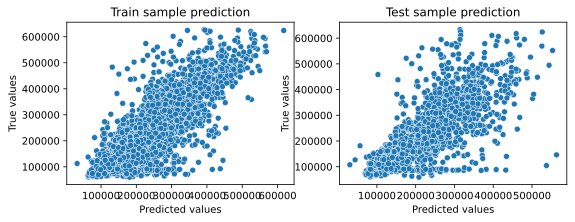

In [ ]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_train_preds = lr_model.predict(X_train)
y_valid_preds = lr_model.predict(X_valid)

evaluate_preds(y_train, y_train_preds, y_valid, y_valid_preds)

####**Решающее дерево**

Train R2:	1.0
Test R2:	0.437


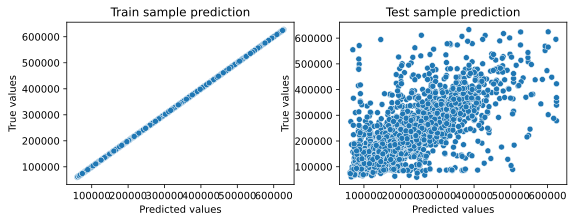

In [ ]:
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)

y_train_preds = dt_model.predict(X_train)
y_valid_preds = dt_model.predict(X_valid)

evaluate_preds(y_train, y_train_preds, y_valid, y_valid_preds)

####**Gradient Boosting**

Train R2:	0.791
Test R2:	0.437


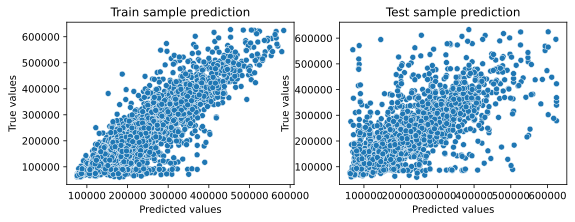

In [ ]:
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)

y_train_preds = gb_model.predict(X_train)
y_valid_preds = dt_model.predict(X_valid)

evaluate_preds(y_train, y_train_preds, y_valid, y_valid_preds)

####**Случайный лес**

Train R2:	0.966
Test R2:	0.69


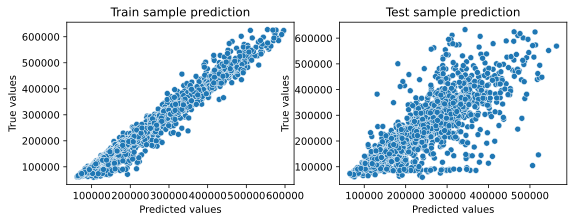

In [ ]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

y_train_preds = rf_model.predict(X_train)
y_valid_preds = rf_model.predict(X_valid)

evaluate_preds(y_train, y_train_preds, y_valid, y_valid_preds)

####**Выбираем метод "случайного леса".**

###3.5 Подбор параметров <a class='anchor' id='tune'>

In [ ]:
'''params = {'max_features':[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 14], 
          'max_depth':[5, 10, 15, 20, 25],
          'n_estimators': [100, 200, 400, 800, 1600],
          'random_state':[10, 21, 42, 84],
          'min_samples_leaf':[10, 50, 100, 200, 400]}

gs = GridSearchCV(rf_model, params, 
                  scoring='r2', # метрика 
                  cv=KFold(n_splits=4,   # k (кол-во разбиений/итераций) в кросс-валидации
                           random_state=21, 
                           shuffle=True),
                  n_jobs=-1
                  )
gs.fit(X_train, y_train)

y_train_preds = gs.predict(X_train)
y_valid_preds = gs.predict(X_valid)

evaluate_preds(y_train, y_train_preds, y_valid, y_valid_preds)'''

"params = {'max_features':[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 14], \n          'max_depth':[5, 10, 15, 20, 25],\n          'n_estimators': [100, 200, 400, 800, 1600],\n          'random_state':[10, 21, 42, 84],\n          'min_samples_leaf':[10, 50, 100, 200, 400]}\n\ngs = GridSearchCV(rf_model, params, \n                  scoring='r2', # метрика \n                  cv=KFold(n_splits=4,   # k (кол-во разбиений/итераций) в кросс-валидации\n                           random_state=21, \n                           shuffle=True),\n                  n_jobs=-1\n                  )\ngs.fit(X_train, y_train)\n\ny_train_preds = gs.predict(X_train)\ny_valid_preds = gs.predict(X_valid)\n\nevaluate_preds(y_train, y_train_preds, y_valid, y_valid_preds)"

In [ ]:
#gs.best_params_

**Подбор дал параметры 'max_depth'=15, 'max_features'=8**

###3.6 Итоговая модель <a class='anchor' id='choosen_one'>


Train R2:	0.952
Test R2:	0.706


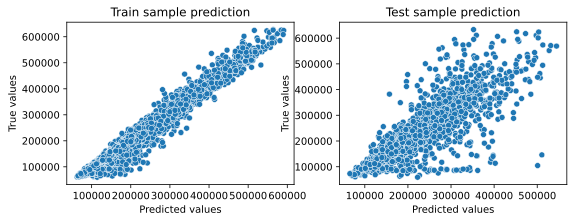

In [ ]:
final_model = RandomForestRegressor(max_depth=15, max_features=10)
final_model.fit(X_train, y_train)

y_train_preds = final_model.predict(X_train)
y_valid_preds = final_model.predict(X_valid)

evaluate_preds(y_train, y_train_preds, y_valid, y_valid_preds)

In [ ]:
cv_score = cross_val_score(final_model, X_train, y_train, scoring='r2', cv=KFold(n_splits=4, shuffle=True, random_state=21))
cv_score

array([0.77539561, 0.75332303, 0.75627886, 0.74372611])

In [ ]:
feature_importances = pd.DataFrame(zip(X_train.columns, final_model.feature_importances_), 
                                   columns=['feature_name', 'importance'])

feature_importances.sort_values(by='importance', ascending=False)

feature_name  importance
18   MedPriceByDistrict    0.359662
1                Square    0.166150
0                 Rooms    0.082557
16         DistrictSize    0.067913
2            LifeSquare    0.040386
11             Social_2    0.026103
22       LifeSquareFrac    0.025683
10             Social_1    0.023278
6             HouseYear    0.021159
21  MedPriceByFloorYear    0.020765
5            HouseFloor    0.020168
17      IsDistrictLarge    0.019386
12             Social_3    0.018587
24   LifeKitchenBalance    0.017953
23    KitchenSquareFrac    0.016461
19          DistrictAge    0.016201
7             Ecology_1    0.014461
4                 Floor    0.013003
3         KitchenSquare    0.012319
14              Shops_1    0.008063
13          Helthcare_2    0.007195
15              Shops_2    0.000969
9             Ecology_3    0.000944
20        IsDistrictNew    0.000531
8             Ecology_2    0.000104

## 4. Обработка тестовых данных <a class='anchor' id='real_work'>

In [ ]:
submit = pd.read_csv('/content/drive/My Drive/_ML/GB/5_py_alg/webinar6/sample_submission.csv')
submit.head()

Id     Price
0  4567  200000.0
1  5925  200000.0
2   960  200000.0
3  3848  200000.0
4   746  200000.0

In [ ]:
predictions = final_model.predict(test_df)
predictions

array([162624.01955144, 148088.13632437, 176327.66006488, ...,
       146545.78511618, 193642.24384391, 212269.26534333])

In [ ]:
test_df.head()

Rooms    Square  ...  KitchenSquareFrac  LifeKitchenBalance
0   -1.0 -0.665972  ...          -0.696383            0.403107
1   -1.0 -0.002239  ...           1.557604            0.256360
2    0.0  0.288897  ...           0.079032            0.476874
3    1.0 -0.125613  ...           0.443845           -0.058974
4   -1.0  0.051336  ...          -0.661645           -0.523156

[5 rows x 25 columns]

In [ ]:
submit['Price'] = predictions
submit.head()

Id          Price
0  4567  162624.019551
1  5925  148088.136324
2   960  176327.660065
3  3848  172053.767739
4   746  187923.623384

In [ ]:
submit.to_csv('/content/drive/My Drive/_ML/GB/5_py_alg/webinar6/2021.10.30_v4_GB_submission.csv', index=False, sep=',')